## Work with non-linearities:



For each non-linearity function, compute it's output on some input $x$



### Affine map



The basis of neural networks, the affine map is an abstraction of a neuron which multiplies each input by a weight and then sums them up. A bias is added to properly center the result.   

Affine transformations are defined as 

$$ y = Ax + b $$

where $A$    is a matrix of weights, $x$ is the input vector, and $b$ is a bias vector. It can be seen as a linear transformation.



In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

#For warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set the seed for torch
torch.manual_seed(1)  

The matrix form of linear transformation for the data is defined as: 

$$y= xA^T +b$$

In [3]:
# define an affine map where the input's size is 5
lin = nn.Linear(5, 3) 

In [4]:
# define a 2x5 data
data = torch.randn(2, 5) 
print(data)

tensor([[-1.1948,  0.0250, -0.7627,  1.3969, -0.3245],
        [ 0.2879,  1.0579,  0.9621,  0.3935,  1.1322]])


In [5]:
# apply it to the data.
print(lin(data))

tensor([[ 0.1755, -0.3268, -0.5069],
        [-0.6602,  0.2260,  0.1089]], grad_fn=<AddmmBackward>)


In [6]:
# what happened?
# print the weights in lin.weight
print("weights:", lin.weight)
# print the bias in lin.bias
print("bias:", lin.bias)

for p in lin.parameters():
    print(p)

weights: Parameter containing:
tensor([[ 0.2304, -0.1974, -0.0867,  0.2099, -0.4210],
        [ 0.2682, -0.0920,  0.2275,  0.0622, -0.0548],
        [ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326]], requires_grad=True)
bias: Parameter containing:
tensor([-0.0403,  0.0648, -0.0018], requires_grad=True)
Parameter containing:
tensor([[ 0.2304, -0.1974, -0.0867,  0.2099, -0.4210],
        [ 0.2682, -0.0920,  0.2275,  0.0622, -0.0548],
        [ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326]], requires_grad=True)
Parameter containing:
tensor([-0.0403,  0.0648, -0.0018], requires_grad=True)


## Non-linear functions




### Plot a rectified linear unit (ReLu) function

The ReLu function is defined by:

$$ y = \begin{cases} 
x &; \quad if \quad x > 0 \\ 
0 &; \quad otherwise 
\end{cases} $$



In [7]:
# define x to be a range of (-5,5)
x = torch.arange(-5.,5.)

In [8]:
# define y as relu(x) using torch.relu
y = torch.relu(x) 
print(y)

tensor([0., 0., 0., 0., 0., 0., 1., 2., 3., 4.])


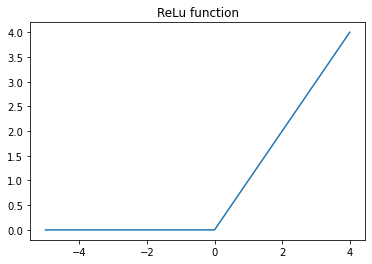

In [9]:
# plot
plt.title('ReLu function')
plt.plot(x,y)

### Plot a sigmoid function



Sigmoid function is defined as:

$$ y = \frac{1}{1 + e^{-x}} $$



In [10]:
# define x to be a range of (-5,5)
x = torch.arange(-5.,5.) 

In [11]:
# define y as sigmoid(x) using torch.sigmoid
y = torch.sigmoid(x)

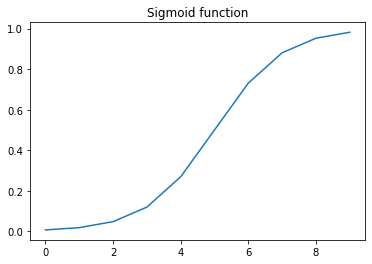

In [12]:
plt.title('Sigmoid function')
plt.plot(y)

### Plot a $Tanh$ function



tanh function is defined as:

$$ y = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$



In [13]:
# define x to be a range of (-5,5)
x = torch.arange(-5.,5.)

In [14]:
# define y as tanh(x) using torch.tanh
y = torch.tanh(x)

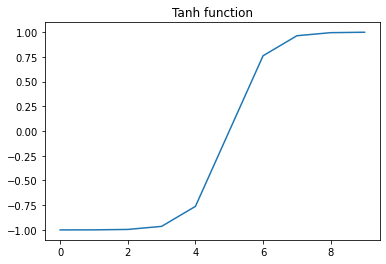

In [15]:
plt.title('Tanh function')
plt.plot(y)

### Define a ReLU layer in PyTorch



Try and apply ReLU to the image we downloaded in the last notebook



In [25]:
!wget "https://drive.google.com/uc?id=1DeAk2H22KadwmVmLshtbll6K-NkO5Vwb" -O "veins.png"
img = plt.imread('veins.png')

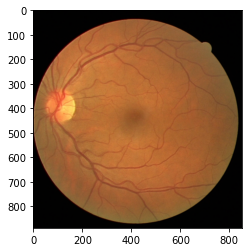

In [17]:
plt.imshow(img)

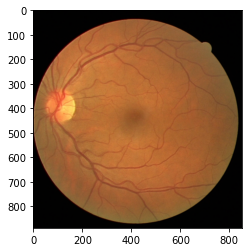

In [18]:
torch_img = torch.from_numpy(img)
relu_img = torch.relu(torch_img)
plt.imshow(relu_img)

### Experiment with softMax and verify it is a probability distribution function



Softmax is defined as:

$$ y = \frac{e^{x_j}}{\sum_j{e^{x_j}}} $$



In [19]:
# define x to be a random tensor with the size of 5
x = torch.rand(5)
print(x)

tensor([0.7140, 0.2676, 0.9906, 0.2885, 0.8750])


In [20]:
# apply softmax to x along the 0th dimension
torch.softmax(x, dim=0)

tensor([0.2089, 0.1337, 0.2755, 0.1365, 0.2454])

In [21]:
# verify that it returns a normalized probability distribution along that axis
torch.softmax(x, dim=0).sum()

tensor(1.0000)

In [22]:
#take the output of the softmax
#if this is a classification problem, what is the probability of the most probable class?
torch.softmax(x, dim=0).max()

tensor(0.2755)

In [23]:
#repeat with a 5x2 random tensor - remember to use .sum(0) instead of sum()
xx = torch.rand(5,2)
print(torch.softmax(xx, 0))
print(torch.softmax(xx, 0).sum(0))

tensor([[0.1937, 0.1774],
        [0.2490, 0.1771],
        [0.2231, 0.1999],
        [0.1823, 0.1428],
        [0.1518, 0.3029]])
tensor([1., 1.])


Why do we bother with exponents in softmax? Why not just normalize the output so that we have a probability distribution? \\
The answer is that we want to mimic the *argmax* function; but a 'soft', probabilistic version of it.

Let's say our model output vector is `[1, 1, 5, 3]`
The argmax of the output is `[0, 0, 1, 0]`

Let's compare a normalized version with softmax:



In [24]:
logits = np.array([1, 1, 5, 3])

# if we just normalized the output we would get
print(logits/np.sum(logits))

# now lets look at the softmax version
print(np.exp(logits)/np.sum(np.exp(logits)))

[0.1 0.1 0.5 0.3]
[0.01562812 0.01562812 0.85326667 0.11547709]


We can see that softmax exaggerates the differences so that the maximum value is much greater than the other values. This is much closer to *argmax*, which is what we want.

